# Guía 5 - Transformada Z

## Ejercicio 4

Considere el sistema continuo
$$
H(s) = \frac{12500s}{44s^2 + 60625s + 625 \cdot 10^4}
$$

y obtenga la función de transferencia $H(z)$ del sistema discreto correspondiente, mediante la utilización de las transformaciones conformes de Euler y Bilineal. Para ello:
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde la respuesta cae 3dB respecto al valor máximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de meustreo cuatro veces superior a ésta.
2. Analice la respuesta en frecuencaia de los dos sistemas discretos obtenidos y compárelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes.

### Solución

Utilizando transformaciones conformes de Euler y Bilineal obtenemos las expresiones de las funciones de transferencia $H(z)$
- Euler: $s = \frac{1-z^{-1}}{T}$
$$
H\left( \frac{1-z^{-1}}{T} \right) = \frac{12500\left( \frac{1-z^{-1}}{T} \right)}{44\left( \frac{1-z^{-1}}{T} \right)^2 + 60625\left( \frac{1-z^{-1}}{T} \right) + 625 \cdot 10^4}
$$
- Bilineal
$$
H\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) = \frac{12500\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)}{44\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)^2 + 60625\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) + 625 \cdot 10^4}
$$

1. Para determinar la frecuencia de corte obtenemos la respuesta en frecuencia del sistema continuo ($H(s)$ para $s=j\omega$), obtenemos el maximo y luego la frecuencia con respuesta 3dB menor al maximo.

377
2438


C:\Users\lusau\AppData\Local\Temp\ipykernel_21352\4166739656.py:15: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(F)


Text(0, 0.5, 'Magnitud [dB]')

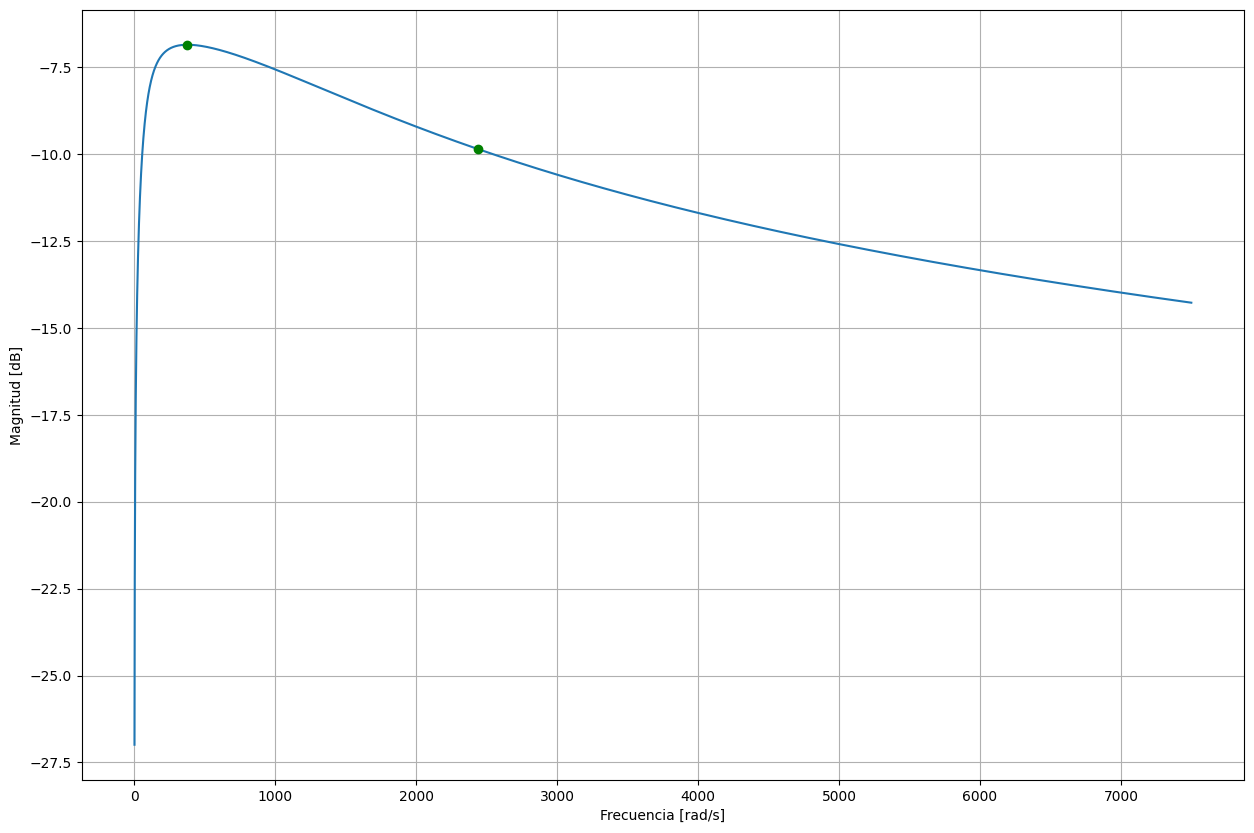

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sEuler(T,z):
    return (np.ones(len(z)) - np.power(z,-1))/T

def sBilineal(T,z):
    return (2/T)*np.divide(np.ones(len(z)) - np.power(z,-1),np.ones(len(z)) + np.power(z,-1))

def H(w):
    '''evaluamos la respuesta en frecuencias del sistema continuo'''
    return np.divide(12500*w, 44*np.power(w,2) + 60625*w + 6250000*np.ones(len(w)))

def todB(F):
    return 10*np.log10(F)

# Parametros
fmtest = 15000
s = 1j*np.arange(fmtest//2)

# Respuesta en frecuencia del sistema continuo
CFT = todB(np.abs(H(s))) # convertir a decibeles
fMax = np.argmax(CFT)
dbMax = CFT[fMax]

# Encontrar frecuencia de corte
fCorte = fMax+1
while CFT[fCorte] > dbMax-3:
    fCorte += 1
print(fMax)
print(fCorte)

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)
ax.grid()

ax.plot(np.abs(s),CFT)
ax.plot(fMax,CFT[fMax], 'go')
ax.plot(fCorte,CFT[fCorte], 'go')
ax.set_xlabel('Frecuencia [rad/s]')
ax.set_ylabel('Magnitud [dB]')

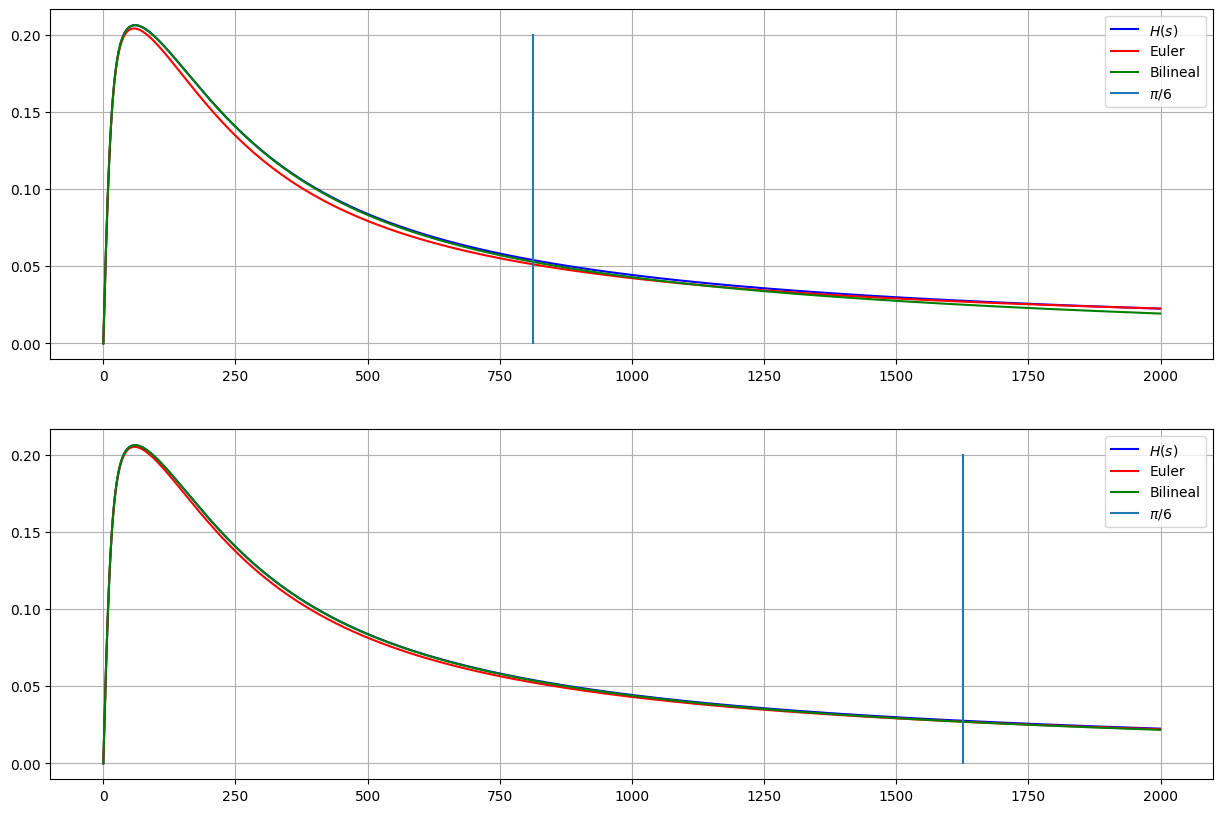

In [7]:
# Obtener funciones de transferencia H(z)
fm = 4*fCorte
T =  1/fm
f = np.arange(fm//2)
omega = np.linspace(0,np.pi,len(f),endpoint=False)
z = np.exp(1j*omega)
HEuler = H(sEuler(T,z))
HBilineal = H(sBilineal(T,z))
s = 1j*2*np.pi*f
HCont = H(s)

# Obtener funciones de transferencia con mayor frecuencia de muestreo
fm2 = 8*fCorte
T2 =  1/(fm2)
f2 = np.arange(fm2//2)
omega2 = np.linspace(0,np.pi,len(f2),endpoint=False)
z2 = np.exp(1j*omega2)
HEuler2 = H(sEuler(T2,z2))
HBilineal2 = H(sBilineal(T2,z2))
s2 = 1j*2*np.pi*f2
HCont2 = H(s2)

fig, ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].plot(f[:2000],np.abs(HCont[:2000]),color='b',label='$H(s)$')
ax[0].plot(f[:2000],np.abs(HEuler[:2000]),color='r',label='Euler')
ax[0].plot(f[:2000],np.abs(HBilineal[:2000]),color='g',label='Bilineal')
ax[0].plot([fm/12,fm/12],[0,0.2],label='$\\pi/6$')  # pi/6
ax[0].legend()

ax[1].plot(f2[:2000],np.abs(HCont2[:2000]),color='b',label='$H(s)$')
ax[1].plot(f2[:2000],np.abs(HEuler2[:2000]),color='r',label='Euler')
ax[1].plot(f2[:2000],np.abs(HBilineal2[:2000]),color='g',label='Bilineal')
ax[1].plot([fm2/12,fm2/12],[0,0.2],label='$\\pi/6$')  # pi/6
ax[1].legend()